Problem: Menganalisis data hasil dari pertandingan kriket tahun 2008 hingga 2019, menggunakan pandas, numpy dan data visualization

In [ ]:
#Importing the libraries (tools) to be used
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'



matches_raw_df = pd.read_csv('/content/sample_data/matches.csv')

matches_raw_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


Menggunakan shape property, kamu dapat menemukan data dengan 756 baris dan 18 kolom. di dalam data tersebut kamu dapat menemukan nama-nama kolom tersebut menggunakan columns property.

In [ ]:
#know the no. of rows and columns using shape
matches_raw_df.shape

(756, 18)

In [ ]:
#Getting the list of columns
matches_raw_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

Untuk mendapatkan ringkasan data kamu dapat menggunakan info(). jika kamu menggunakan info() dapat memunculkan informasi tentang kolom, jumlah nilai non-null di setiap kolom, tipe data dan penggunaan memori.

In [ ]:
#know about data
matches_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

Hampir semua kolom kecuali umpire3 tidak memiliki nilai atau sedikit memiliki nilai. Munculnya nilai null ini dapat disebabkan oleh kurangnya informasi atau memasukan data yang salah. Meskipun tidak ada nilai null untuk kolom result tetapi ada beberapa kolom untuk winner dan player_of_match. 

Pertama kamu bisa mengakses kolom hasil menggunakan matches_raw_df.result, kemudian menggunakan value_counts() pada kolom hasil. value_counts() adalah salah satu rangkain yang mengembalikan jumlah nilai unik. Disini kita bisa melihat nilai-nilai yang berbeda dalam hasil dan jumlah total untuk masing - masing nya.

In [ ]:
#Using value_counts() on result to find the different values in the result column and their total no.
matches_raw_df.result.value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

**Jadi, dari 756 pertandingan ada 4 pertandingan berakhir tanpa hasil.**

Kriket adalah salah satu olahraga yang tidak sama dengan sepak bola, melainkan seperti bisbol yang dimainkan bersama dua kelompok.

Untuk analisis ini, kolom wasit3 tidak diperlukan, jadi saya hapus kolom wasit3 menggunakan drop() dengan meneruskan nama kolom dan nilai nya.

Saya disini menggunakan match_df untuk analisis data selanjutnya.

In [ ]:
matches_df = matches_raw_df.drop('umpire3', axis = 1)

In [ ]:
matches_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


Setelah munculnya data diatas **saya disini mencoba menemukan jumlah pertandingan yang dimainkan setiap musim dari awal hingga 2019**

Disini saya mengelompokkan data berdasarkan musim yang berbeda menggunakan metode groupby(). karena nanti akan muncul id pada setiap pertandingan untuk mengarah apa yang saya inginkan. 

Saya menggunakan count() pada kolom id untuk menemukan hasil pertandingan yang diadakan setiap musim dan setelah itu akan saya akan menggunakan match_per_season.

Kemudian saya menggunakan metode Seaborn yaitu barplot() untuk menunjukan index seri permusim yang akan digunakan untuk nilai x, sedangkan nilai index tersebut akan digunakan untuk nilai y.

Setelah itu saya menggunakan metode matpllotlib.pyplot yang saya gunakan seperti figure(), xticks() dan tittle() untuk mengatur ukuran plot, judul plot dan lain-lain. Setelah itu saya akan mengambil figsize dan mengubahnya menjadi (12,6). Untuk xticks() saya memberikan rotasi nilai 75 agar lebih mudah dibaca.

In [ ]:
matches_per_season = matches_df.groupby('season').id.count()

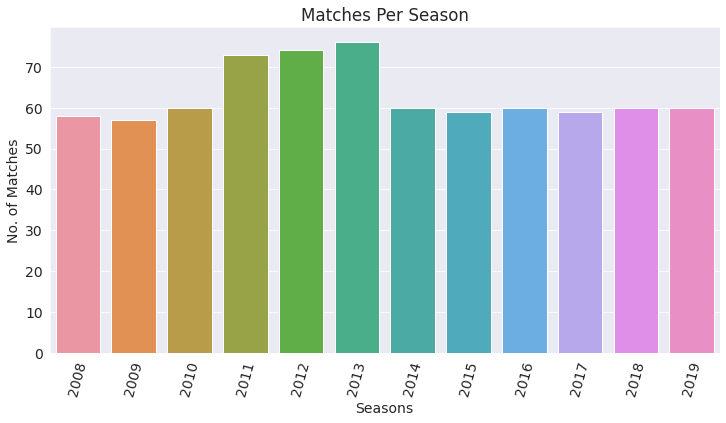

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Matches Per Season')
match_per_season_plot = sns.barplot(x = matches_per_season.index, y = matches_per_season)
match_per_season_plot.set(xlabel = 'Seasons', ylabel = 'No. of Matches');

In [ ]:
#sns.scatterplot(x=”Longitude”, y=”Latitude”, data=match_per_season_plot, s=100, color=”red”, alpha = 0.5)

Jadi disini bisa kita lihat hasil disetiap musim hampir 60 pertandingan dimainkan. Namun, saya melihat lonjakan jumlah pertandingan dari 2011-2013. Itu karena ada dua tim baru, pune warriors dan kocji tuskers kerala, yang dimana menambahkan jumlah tim menjadi 10.